## **Reading and Decoding mini-SEED files from Q8**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime

The Q8s generate mini-SEED files, which are each 4MByte long. The naming convention for these files is for example:

*BK-BK63-20200613151519.330*
             
where BK is the network code, BK63 is the station name and last the time at which the file was written.

The read command contains wild cards and generates a stream called "st".
As seen in the output, "st" contains many separate mini-SEED traces. The info generated for each trace by the command "st.__str__(extended=True)" is:
tracename (according the SEED convention), begin time - end time of data set, sampling rate, number of samples in trace

In [10]:
st = read("./Q8/*BK64*")
print(st.__str__(extended=True))

59 Trace(s) in Stream:
BK.BK64.2C.HNN | 2020-09-15T16:08:33.674201Z - 2020-09-15T16:47:07.979201Z | 200.0 Hz, 462862 samples
BK.BK64.2C.HNZ | 2020-09-15T16:08:40.984201Z - 2020-09-15T16:46:59.059201Z | 200.0 Hz, 459616 samples
BK.BK64.00.HHZ | 2020-09-15T16:08:27.740471Z - 2020-09-15T16:47:06.950471Z | 100.0 Hz, 231922 samples
BK.BK64.00.HHE | 2020-09-15T16:08:23.690471Z - 2020-09-15T16:46:55.500471Z | 100.0 Hz, 231182 samples
BK.BK64.2C.HNE | 2020-09-15T16:08:41.884201Z - 2020-09-15T16:46:49.599201Z | 200.0 Hz, 457544 samples
BK.BK64.00.HNZ | 2020-09-15T16:08:34.370471Z - 2020-09-15T16:46:44.890471Z | 100.0 Hz, 229053 samples
BK.BK64.00.HNE | 2020-09-15T16:08:41.460471Z - 2020-09-15T16:47:05.320471Z | 100.0 Hz, 230387 samples
BK.BK64.00.HNN | 2020-09-15T16:08:43.550471Z - 2020-09-15T16:47:03.670471Z | 100.0 Hz, 230013 samples
BK.BK64.00.HHN | 2020-09-15T16:08:45.420470Z - 2020-09-15T16:46:36.640470Z | 100.0 Hz, 227123 samples
BK.BK64.00.BHE | 2020-09-15T16:08:06.804201Z - 2020-09-15T1

** Selecting and Plotting traces **

One can generate a new stream (here "stsel") by selecting any single trace or set of traces. As an example, if I am interested in the mass positions, I would select the three traces VMZ, VMN and VME, if I am interested in the calibration signal input I would select the traces HCA. I can chose them respectively by using wildcards like "*VM*" or "*HC*" in the first line.
The command "tr.stats" return details of the header of each trace.

3 Trace(s) in Stream:
BK.BK64.00.HHZ | 2020-09-15T16:08:27.740471Z - 2020-09-15T16:47:06.950471Z | 100.0 Hz, 231922 samples
BK.BK64.00.HHE | 2020-09-15T16:08:23.690471Z - 2020-09-15T16:46:55.500471Z | 100.0 Hz, 231182 samples
BK.BK64.00.HHN | 2020-09-15T16:08:45.420470Z - 2020-09-15T16:46:36.640470Z | 100.0 Hz, 227123 samples
         network: BK
         station: BK64
        location: 00
         channel: HHZ
       starttime: 2020-09-15T16:08:27.740471Z
         endtime: 2020-09-15T16:47:06.950471Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 231922
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 82, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096000})

         network: BK
         station: BK64
        location: 00
         channel: HHE
       starttime: 2020-09-15T16:08:23.690471Z
         endtime: 2020-09-15T16:46:55.500471Z
   sampling_rate: 100.0
           

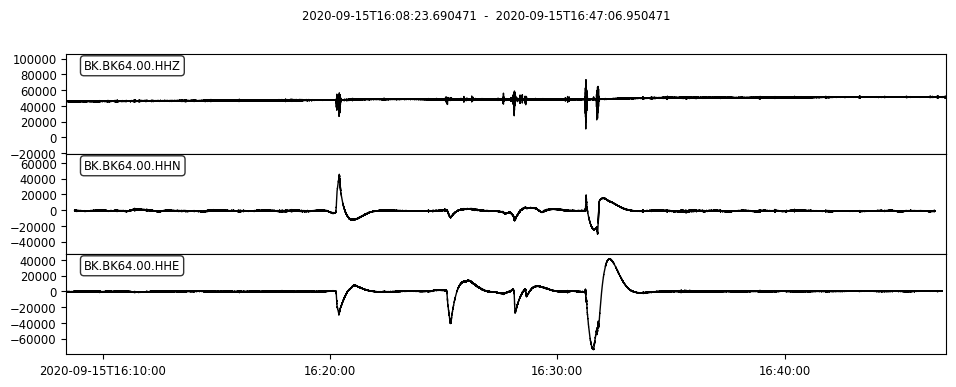

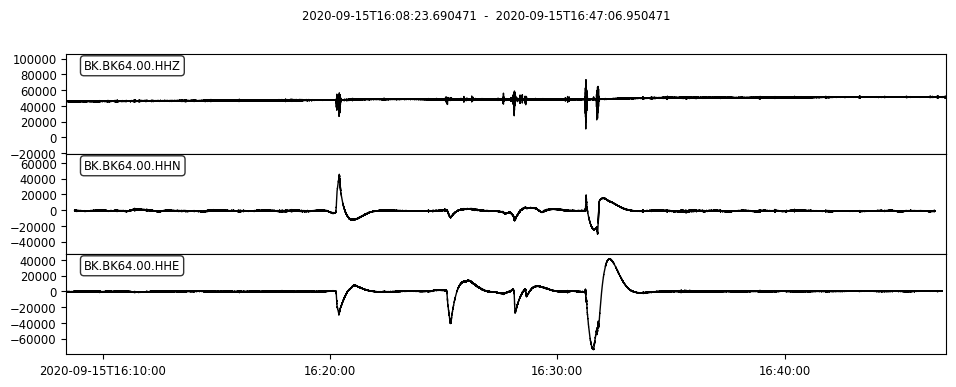

In [11]:
stsel=st.select(id="*HH*")
print(stsel)
tr=stsel [0]
tr1=stsel[1]
tr2=stsel[2]
print (tr.stats)
print()
print (tr1.stats)
print (tr2.stats)


#create overview plot full length of file
stsel.plot(color='black',size=(1000,400),equal_scale=True)

In [13]:
bitw=5*10**-6
for i in range (3):
    tr=stsel[i]
    n=tr.stats.npts
    m=tr.max()
    V=m*bitw
    print (i,n,m,V)


0 18000 -998886 -4.9944299999999995
1 42000 1044146 5.22073
2 48896 -998372 -4.99186


2020-09-15T16:08:27.740471Z 2020-09-15T16:47:06.950471Z
************************


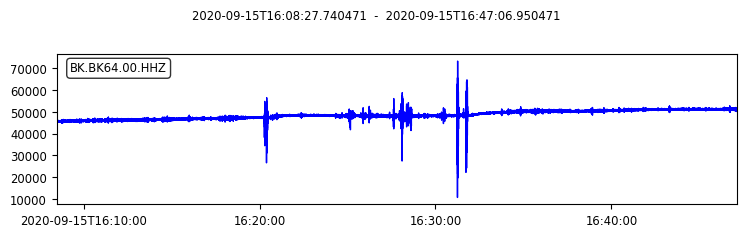

2020-09-15T16:08:27.740471Z 2020-09-15T16:33:27.740471Z 2020-09-15T16:35:27.740471Z
BK.BK64.00.HHZ | 2020-09-15T16:33:27.740471Z - 2020-09-15T16:35:27.740471Z | 100.0 Hz, 12001 samples
**
**


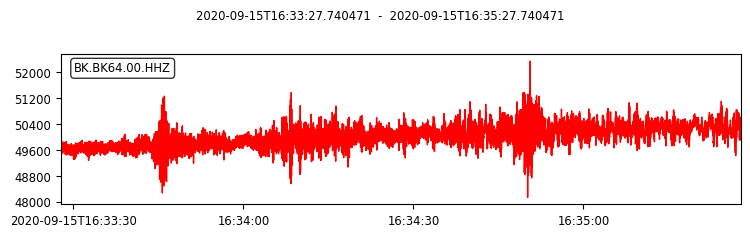

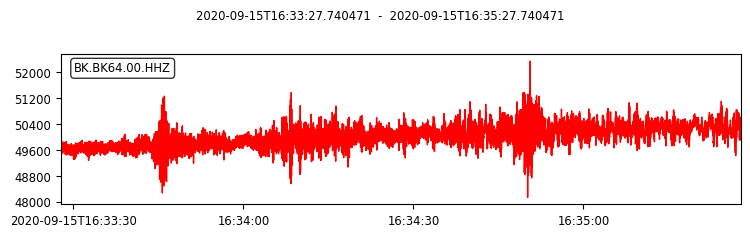

In [14]:
#create plot and slice of data for first event ev1
#plot and slice window ('begin' to 'end') has to be given in seconds from startime dt
#filter and integrate

dt=stsel[0].stats.starttime
tend=stsel[0].stats.endtime
print (dt,tend)

print("************************")
stsel[0].plot(color='blue')


begin=dt+1500
end=begin+120
print (dt, begin, end)
#ev1=st
calpulse = stsel[0].slice(starttime=begin, endtime=end)
print (calpulse)

print ("**")
print ("**")
calpulse.plot(color= "red")

3 Trace(s) in Stream:
BK.BK63.00.HHZ | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:19.490470Z | 100.0 Hz, 388664 samples
BK.BK63.00.HHN | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:15.530470Z | 100.0 Hz, 388268 samples
BK.BK63.00.HHE | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:05.730470Z | 100.0 Hz, 387288 samples
         network: BK
         station: BK63
        location: 00
         channel: HHZ
       starttime: 2020-06-22T19:53:32.860470Z
         endtime: 2020-06-22T20:58:19.490470Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 388664
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 124, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096000})

         network: BK
         station: BK63
        location: 00
         channel: HHN
       starttime: 2020-06-22T19:53:32.860470Z
         endtime: 2020-06-22T20:58:15.530470Z
   sampling_rate: 100.0
          

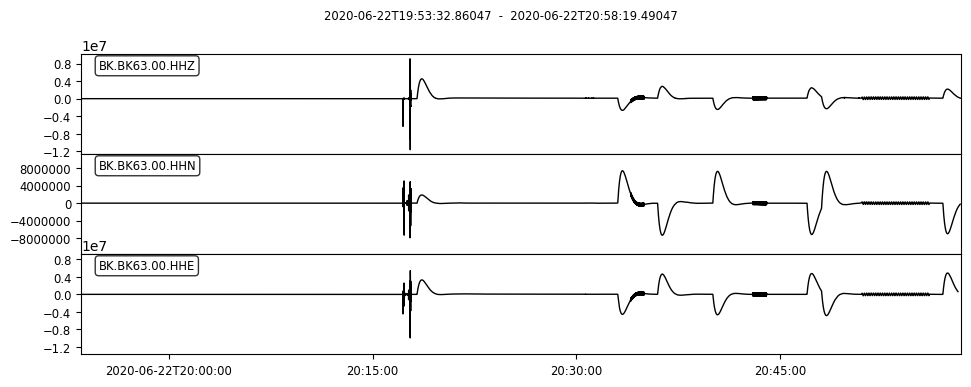

In [21]:
stsel=st.select(id="*HH*")
print(stsel)
tr=stsel [0]
tr1=stsel[1]
tr2=stsel[2]
print (tr.stats)
print()
print (tr1.stats)
print (tr2.stats)


#create overview plot full length of file
stsel.plot(color='black',size=(1000,400),equal_scale=True)